# Kmeans Clustering
### Cluster lable를 구하면 기존 변수와 상관관계가 높아지게 되어 예측성능이 저하되기에 
- Cluster transform(거리)를 구해 (만약 cluster가 n개이면, 기존변수는 모두 버리고 n개의 변수(거리)로 예측)

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import warnings
warnings.filterwarnings(action='ignore')

import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = 'Malgun Gothic'  # 한글 표시
plt.rcParams['axes.unicode_minus'] = False  #한글 폰트 사용시 마이너스 폰트 깨짐 해

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=17)
X_train.shape

(426, 30)

### 1. 원래 특성행렬로 지도학습

In [3]:
lgr = LogisticRegression(random_state=0)
lgr.fit(X_train, y_train).score(X_test, y_test)

0.9230769230769231

### 2. 원래 특성행렬과 군집 label 변수로 지도학습

In [4]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=17)
X_clusters = kmeans.fit_predict(X_train).reshape(-1, 1)
pd.DataFrame(X_clusters, columns=['클러스터']).head()
lgr.fit(np.hstack([X_train, X_clusters]), y_train)
lgr.score(np.hstack([X_test, kmeans.predict(X_test).reshape(-1, 1)]), y_test)

,클러스터
0,0
1,0
2,2
3,0
4,0


LogisticRegression(random_state=0)

0.9300699300699301

### 3. 원래 특성행렬과 군집간의 거리를 변수로 지도학습

In [5]:
X_clusters_distance = kmeans.fit_transform(X_train)
distance = ['군집1_거리', '군집2_거리', '군집3_거리']
pd.DataFrame(X_clusters_distance, columns=distance).head()
lgr.fit(np.hstack([X_train, X_clusters_distance]), y_train)
lgr.score(np.hstack([X_test, kmeans.transform(X_test)]), y_test)

,군집1_거리,군집2_거리,군집3_거리
0,460.810456,2856.187554,1492.436826
1,246.126672,2155.525148,788.934356
2,1193.675364,1275.165189,360.824967
3,177.948433,2578.850344,1211.961091
4,69.661908,2470.238122,1102.790002


LogisticRegression(random_state=0)

0.951048951048951

아마도 원래 데이터와 소속 군집의 무게중심과의 거리는 상관관계가 있다

In [6]:
col_names = load_breast_cancer()['feature_names'].tolist() + distance
data = pd.DataFrame(np.hstack([X_train, X_clusters_distance]), columns=col_names)
data.iloc[:, 25:].head()

,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,군집1_거리,군집2_거리,군집3_거리
0,0.43100,0.538100,0.07879,0.3322,0.14860,460.810456,2856.187554,1492.436826
1,0.32620,0.320900,0.13740,0.3068,0.07957,246.126672,2155.525148,788.934356
2,0.40020,0.421100,0.21340,0.3003,0.10480,1193.675364,1275.165189,360.824967
3,0.07348,0.004955,0.01111,0.2758,0.06386,177.948433,2578.850344,1211.961091
4,0.08862,0.114500,0.07431,0.2694,0.06878,69.661908,2470.238122,1102.790002


<AxesSubplot:>

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5, 31.5, 32.5]),
 [Text(0.5, 0, 'mean radius'),
  Text(1.5, 0, 'mean texture'),
  Text(2.5, 0, 'mean perimeter'),
  Text(3.5, 0, 'mean area'),
  Text(4.5, 0, 'mean smoothness'),
  Text(5.5, 0, 'mean compactness'),
  Text(6.5, 0, 'mean concavity'),
  Text(7.5, 0, 'mean concave points'),
  Text(8.5, 0, 'mean symmetry'),
  Text(9.5, 0, 'mean fractal dimension'),
  Text(10.5, 0, 'radius error'),
  Text(11.5, 0, 'texture error'),
  Text(12.5, 0, 'perimeter error'),
  Text(13.5, 0, 'area error'),
  Text(14.5, 0, 'smoothness error'),
  Text(15.5, 0, 'compactness error'),
  Text(16.5, 0, 'concavity error'),
  Text(17.5, 0, 'concave points error'),
  Text(18.5, 0, 'symmetry error'),
  Text(19.5, 0, 'fractal dimension error'),
  Text(20.5, 0, 'worst radius'),
  Text(21.5, 0, 'worst texture'),

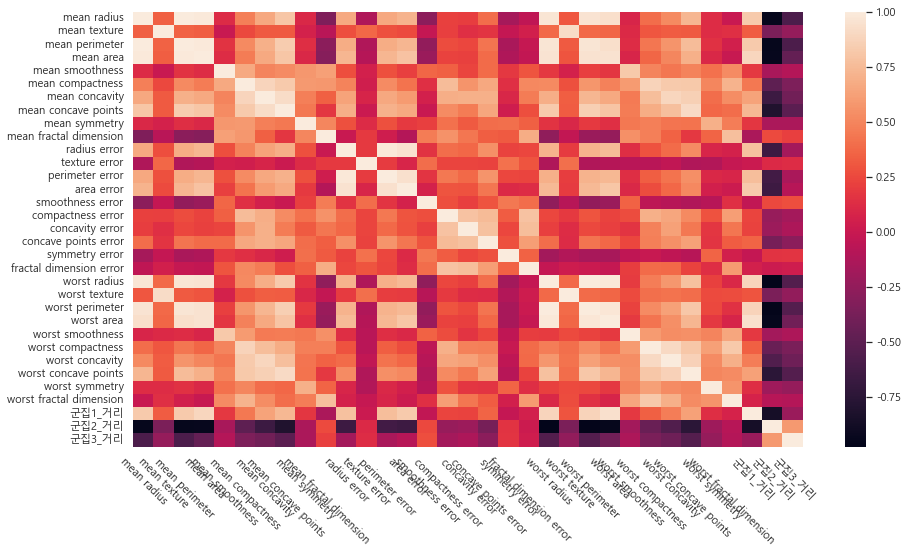

In [7]:
sns.set(rc = {'figure.figsize':(15,8)})
plt.rcParams['font.family'] = 'Malgun Gothic'  # 한글 표시
sns.heatmap(data.corr())
plt.xticks(rotation=-45)

### 군집간 거리 특성변수만으로 지도학습
- 원래 데이터와 군집간 거리와의 상관관계가 존재한다면

In [8]:
kmeans = KMeans(n_clusters=3, random_state=17)
X_clusters = kmeans.fit_transform(X_train)
pd.DataFrame(X_clusters).head()
lgr.fit(X_clusters, y_train)
lgr.score(kmeans.transform(X_test), y_test)

,0,1,2
0,460.810456,2856.187554,1492.436826
1,246.126672,2155.525148,788.934356
2,1193.675364,1275.165189,360.824967
3,177.948433,2578.850344,1211.961091
4,69.661908,2470.238122,1102.790002


LogisticRegression(random_state=0)

0.951048951048951

### 아주 적은 변수로도 예측 성능이 높아지게 되었으며 K-means 방법론은 차원 축소알고리즘으로 사용이 가능

### 다중공선성이 높은 변수를 제거하여 예측

In [19]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(data, i) for i in range(data.shape[1])]
vif["features"] = data.columns
vif.sort_values('VIF Factor', ascending=False)

,VIF Factor,features
0,75063.806341,mean radius
2,72638.083625,mean perimeter
20,11987.676355,worst radius
22,5120.454159,worst perimeter
3,2215.040959,mean area
23,1742.875718,worst area
9,1209.599724,mean fractal dimension
31,554.022525,군집2_거리
29,483.259001,worst fractal dimension
24,430.637882,worst smoothness


In [10]:
nf = vif.sort_values('VIF Factor', ascending=False).tail(10)['features'].to_list()
'/'.join(nf)

'worst concavity/군집1_거리/concave points error/compactness error/군집3_거리/symmetry error/fractal dimension error/concavity error/smoothness error/texture error'

# End